In [5]:
# plot feature importance using built-in function
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import numpy as np
from xgboost import plot_importance
from matplotlib import pyplot
# load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


(240000, 15)
(240000, 67)


c:\users\manuel\appdata\local\programs\python\python37-32\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\manuel\appdata\local\programs\python\python37-32\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


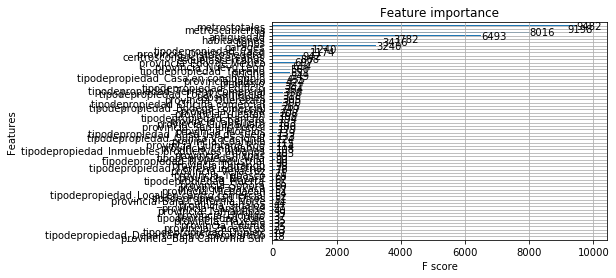

In [6]:
#----------------PREPROCESAMIENTO----------------
df_train_xgboost = df_train
df_test_xgboost = df_test

#df_train_xgboost = df_train_xgboost.drop(['fecha','titulo','descripcion','direccion','idzona','lat','lng'], axis=1)
#df_train_xgboost = df_train_xgboost.fillna(value = {'ciudad': 0, 'provincia': 0, 'tipodepropiedad': 0})

df_train_xgboost = df_train_xgboost.drop(['ciudad','fecha','titulo','descripcion','direccion','idzona','lat','lng'], axis=1)
df_test_xgboost = df_test_xgboost.drop(['ciudad','fecha','titulo','descripcion','direccion','idzona','lat','lng'], axis=1)
#df_train_xgboost = df_train_xgboost.fillna(value = {'provincia': 0, 'tipodepropiedad': 0})

print(df_train_xgboost.shape)
#XGBoost maneja los NaNs, ver despues si lo dejamos como esta

df_train_xgboost = pd.get_dummies(df_train_xgboost, drop_first=True)#, sparse = True)
df_test_xgboost = pd.get_dummies(df_test_xgboost, drop_first=True)#, sparse = True)

print(df_train_xgboost.shape)
precio = df_train_xgboost['precio']
df_train_xgboost.drop(labels=['precio'], axis=1,inplace = True)
df_train_xgboost.insert(len(df_train_xgboost.columns), 'Precio', precio)

X_train, y_train = df_train_xgboost.iloc[:,:-1],df_train_xgboost.iloc[:,-1]

df_test_xgboost['tipodepropiedad_Garage'] = 0
df_test_xgboost['tipodepropiedad_Hospedaje'] = 0
df_test_xgboost = df_test_xgboost[list(X_train.columns.values)]


xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.05,
                max_depth = 7, min_child_weight = 4, n_estimators = 700, nthread = 4, subsample = 0.7, silent = 1)

xg_reg.fit(X_train,y_train)

plot_importance(xg_reg)
pyplot.show()

In [1]:
plot_importance(xg_reg, max_num_features = 10)
pyplot.show()

NameError: name 'plot_importance' is not defined

In [ ]:
def RMSLE(actual, pred):
    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

dummy_rmsle = RMSLE(y_test, pred)
dummy_rmsle_train = RMSLE(y_train, dummy.predict(X_train))
print(f"RMSLE DummyRegressor (train): {dummy_rmsle_train:.5f}")
print(f"RMSLE DummyRegressor: {dummy_rmsle:.5f}")